# NEWS - Web Scrapping & Sentiment Analysis

### Importing libraries

In [242]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

### Asking the news for particular topic:

In [243]:
print('''1 - HDFC
2 - Infosys''')

1 - HDFC
2 - Infosys


### After user input & parsing the  html:

In [244]:
inp = int(input('Enter a number: '))
if inp == 1:
    end = 'HDFC-Bank/news'
elif inp == 2:
    end = 'infosys/news'   
    
page = requests.get('https://timesofindia.indiatimes.com/topic/' + end)

soup = BeautifulSoup(page.content,'html.parser')

Enter a number: 1


### Finding the content (news headlines):

In [245]:
news = soup.find_all(class_ = 'title')
headline = [item.contents[0] for item in news]

### Coverting it into a single paragraph and filtering:

In [246]:
actual_text = ''
count = 0
for line in headline:
    actual_text = actual_text + ' ' + line
    count += 1
    print(count,line)
    if count>10:
        break    

1 
HDFC Q4 net falls 22%, no bank dividend

2 
HDFC Ltd Q4 profit declines 10% to Rs 4,342 crore

3 
Banks lead sensex slide, bonds up after RBI cut

4 
Apple iPhone SE to get Rs 3,600 discount with HDFC Bank debit and credit cards

5 
Yes Bank plans bad bank, eyes Rs 15k cr capital raise

6 
Sensex dives 2,002 points on PMI’s historic low, global cues

7 
HDFC Life Insurance Q4 result today, stock up 5%

8 
HDFC acquires 6.43% stake in Reliance Capital

9 
Nippon MF, HDFC MF stocks crash

10 
Sensex gains 743 pts riding on RIL rally to end at 31,380

11 
Oil price slide, virus spread pull sensex down 1,011 pts



In [247]:
lower_case = actual_text.lower()

### Removing punctuations and cleaning:

In [248]:
cleaned_text = lower_case.translate(str.maketrans('','',string.punctuation))
cleaned_final = cleaned_text.replace('\n','').strip()

### Splitting the text into list:

In [249]:
tokenized_words = word_tokenize(cleaned_final,'english')

### Removing the stopwords (eg. I, he, she etc.)

In [250]:
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

### Managing the words (plural to singular) & (base form of word eg.'better' -> 'good'):

In [251]:
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

### Importing a text with emotions and compare it with our text:

In [252]:
emotion_list = []
with open('Emotions.txt','r') as file:
    for line in file:
        clear_line = line.replace('\n','').replace(',','').replace("'",'').strip()
        word,emotion = clear_line.split(':')
        if word in lemma_words:
            emotion_list.append(emotion)

###  Count the number of similar emotions:

In [253]:
w = Counter(emotion_list)

### Sentiment score (positive/negative/neutral):

In [254]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    print('Negative %:', score['neg']*100,'%')
    print('Positive %:', score['pos']*100,'%')
    print('Neutral %:', score['neu']*100,'%')
    if score['neg']>score['pos'] and score['neg']>score['neu']:
        print('Overall the news is Negative')
    elif score['pos']>score['neg'] and score['pos']>score['neu']:
        print('Overall the news is Positive')
    elif score['pos'] == score['neg'] or (score['neu']>score['pos'] and score['neu']>score['neg']):
        print('Overall the news is Neutral')

In [255]:
sentiment_analyse(cleaned_final)

Negative %: 10.5 %
Positive %: 8.799999999999999 %
Neutral %: 80.7 %
Overall the news is Neutral


### Plotting histogram for the emotions:

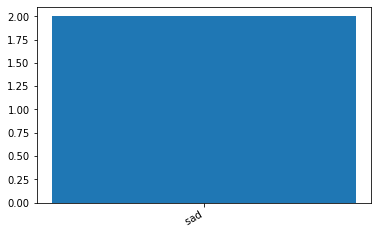

In [256]:
fig,ax1 = plt.subplots()
ax1.bar(w.keys(),w.values())
fig.autofmt_xdate()